In [131]:
# imports
import h5py
import glob
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import scipy as sp
from scipy.optimize import curve_fit
from lmfit.models import LinearModel, LorentzianModel, GaussianModel, ExponentialModel
from astropy.modeling import models
from astropy import units as u
from scipy.interpolate import interp1d
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

In [2]:
# reading h5 file
f = h5py.File("./20190518_173944_projection.h5")
list(f.keys())
shots = f.get("n-shots")
photE = f.get("x-axis")
intense = f.get("y-axis")

In [3]:
print(shots.shape, photE.shape, intense.shape)

() (2560,) (100, 2560)


In [4]:
# reshaping
photE = np.reshape(photE, (photE.shape[0]))

In [5]:
# separating spectra into different arrays
spectrum = range(0,100)
for i in spectrum:
    globals()['spec%i' % i] = intense[i,:]
print(spec5.shape)

(2560,)


Plot 0


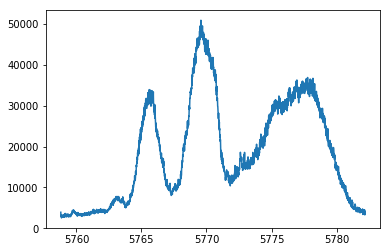

Plot 1


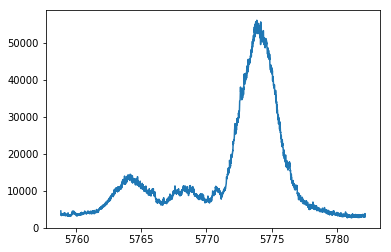

Plot 2


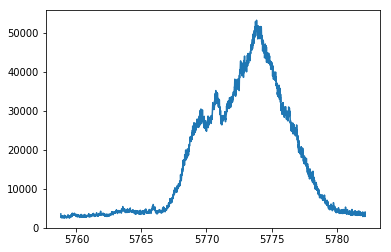

Plot 3


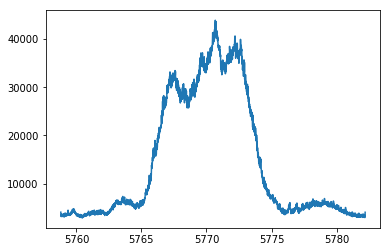

Plot 4


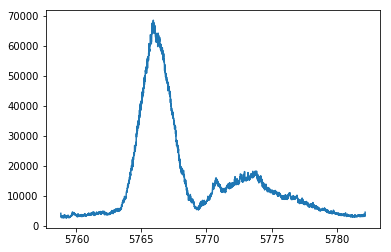

Plot 5


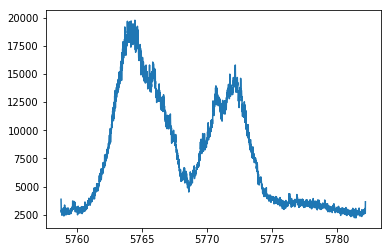

Plot 6


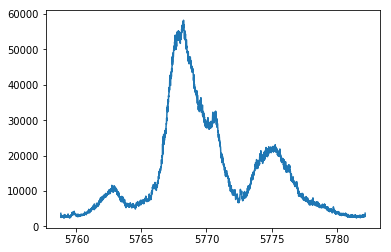

Plot 7


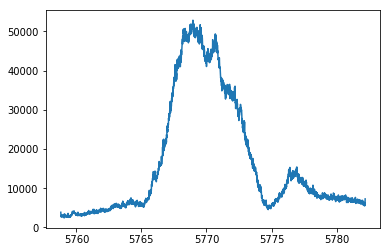

Plot 8


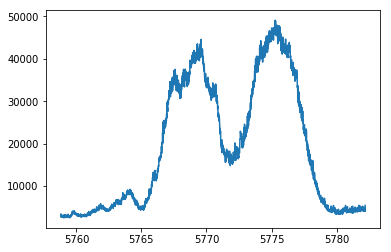

Plot 9


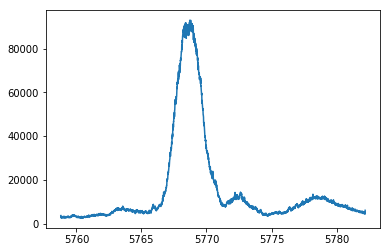

Plot 10


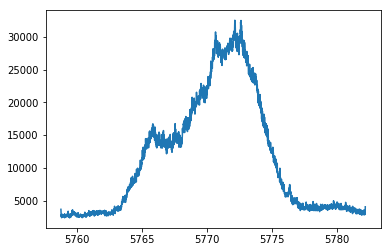

Plot 11


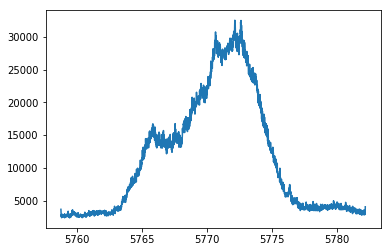

Plot 12


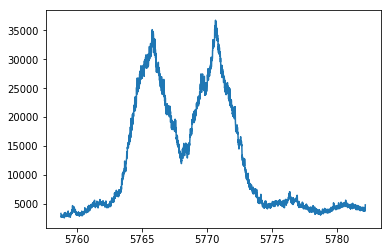

Plot 13


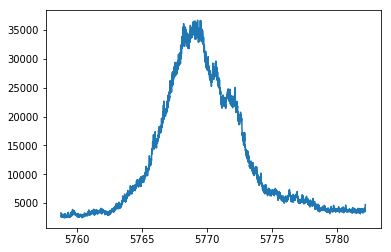

Plot 14


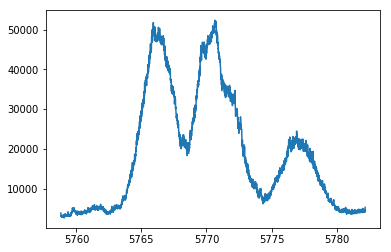

Plot 15


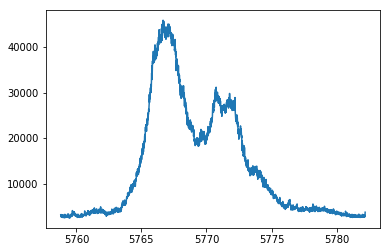

Plot 16


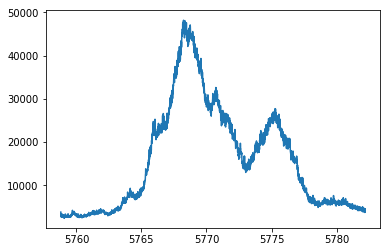

Plot 17


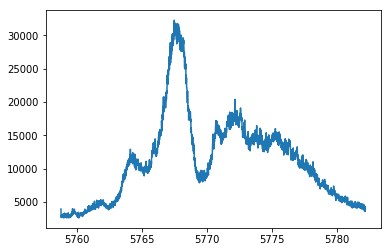

Plot 18


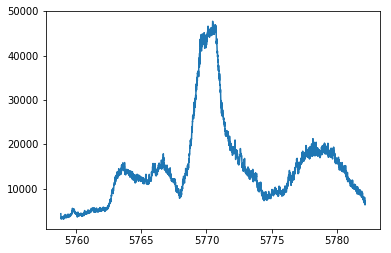

Plot 19


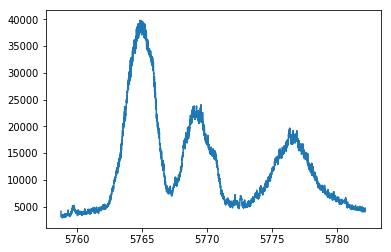

Plot 20


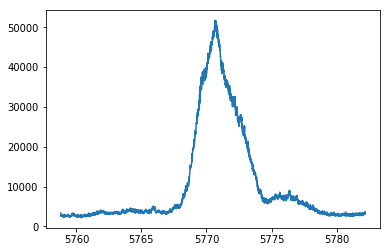

Plot 21


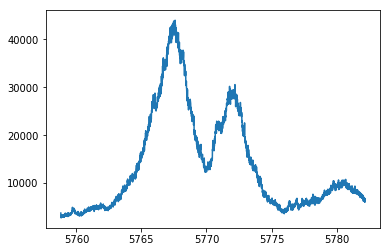

Plot 22


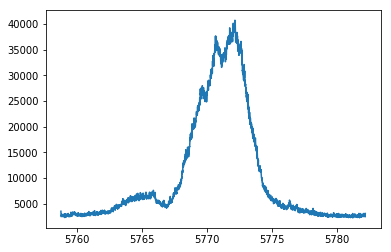

Plot 23


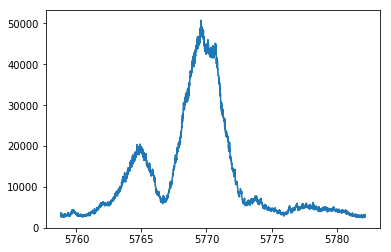

Plot 24


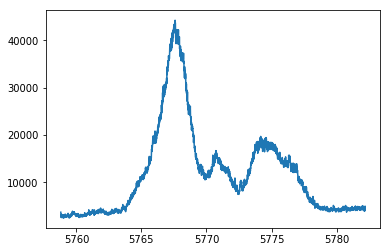

Plot 25


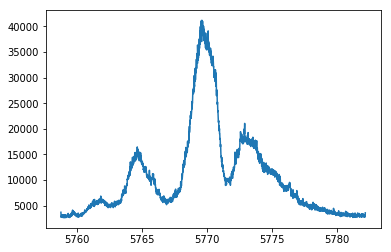

Plot 26


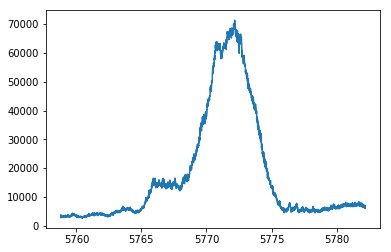

Plot 27


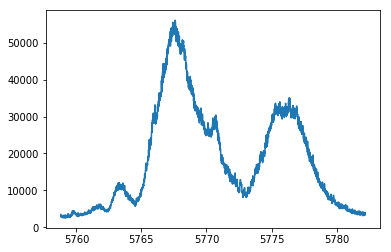

Plot 28


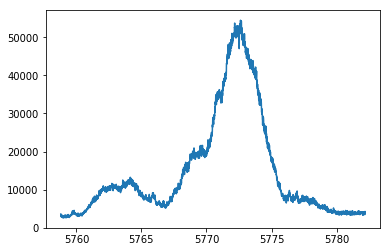

Plot 29


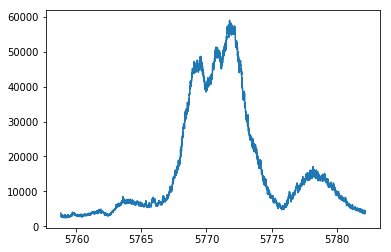

Plot 30


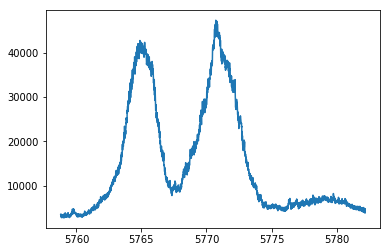

Plot 31


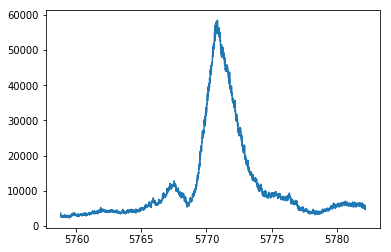

Plot 32


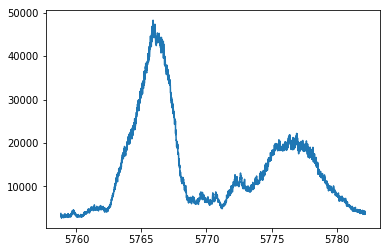

Plot 33


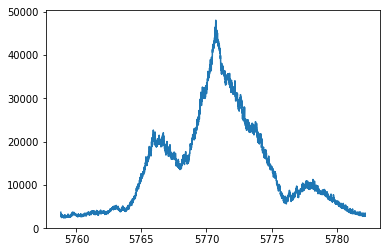

Plot 34


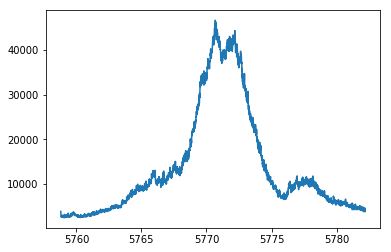

Plot 35


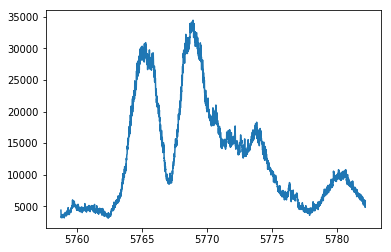

Plot 36


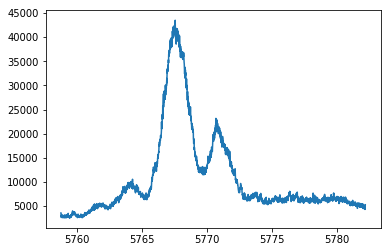

Plot 37


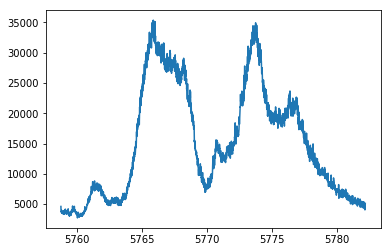

Plot 38


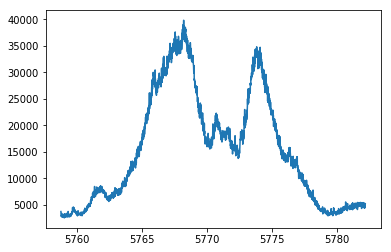

Plot 39


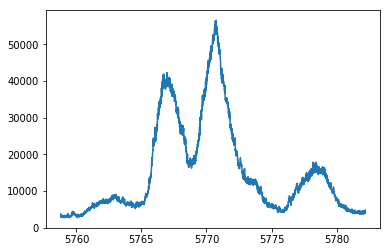

Plot 40


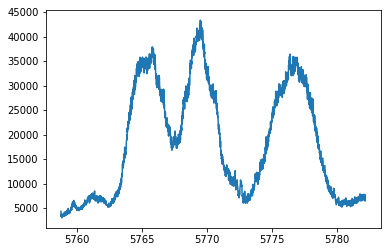

Plot 41


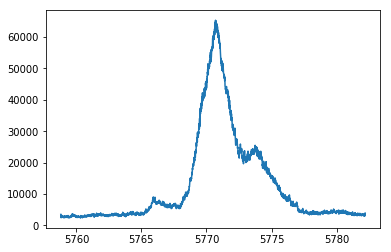

Plot 42


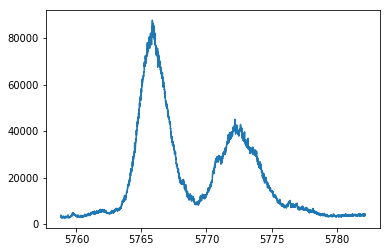

Plot 43


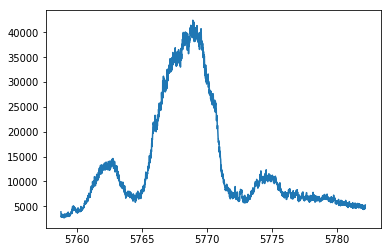

Plot 44


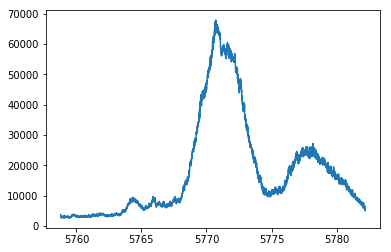

Plot 45


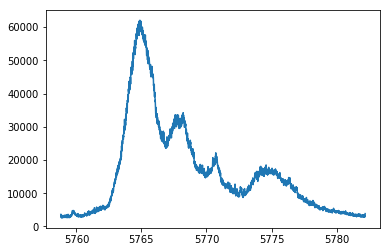

Plot 46


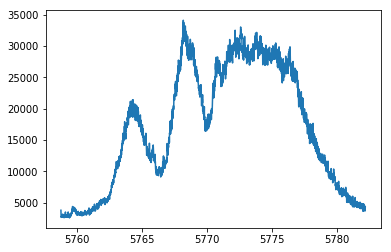

Plot 47


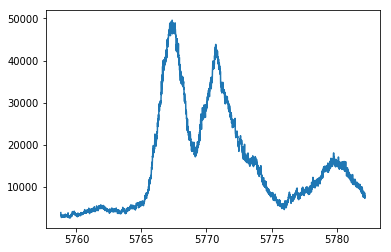

Plot 48


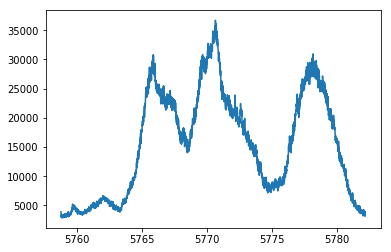

Plot 49


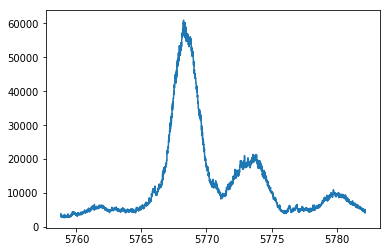

Plot 50


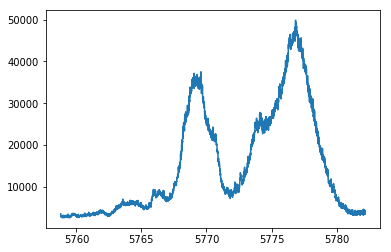

Plot 51


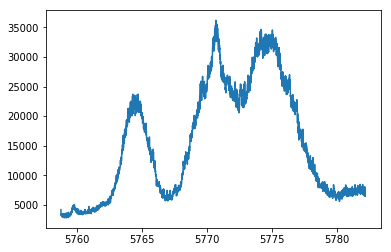

Plot 52


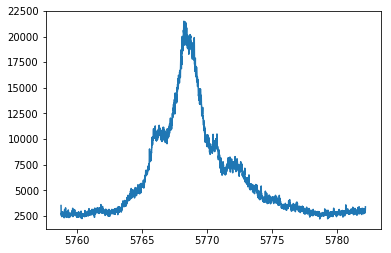

Plot 53


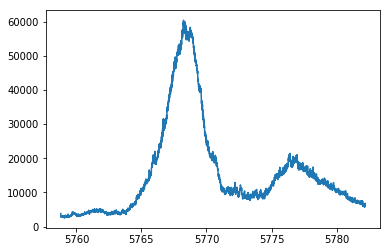

Plot 54


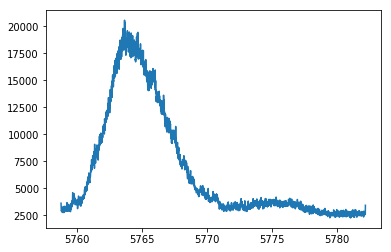

Plot 55


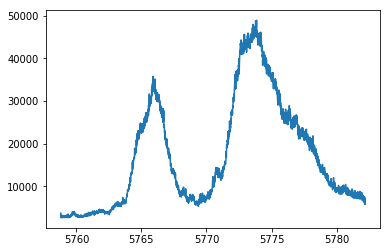

Plot 56


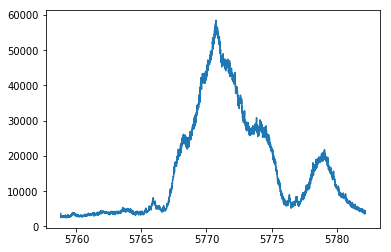

Plot 57


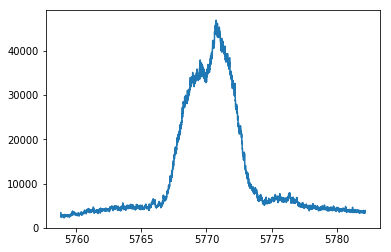

Plot 58


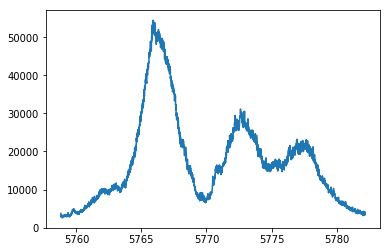

Plot 59


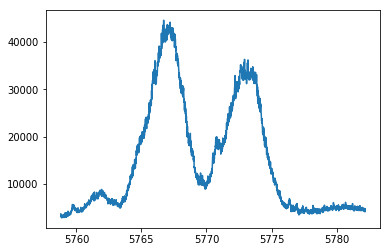

Plot 60


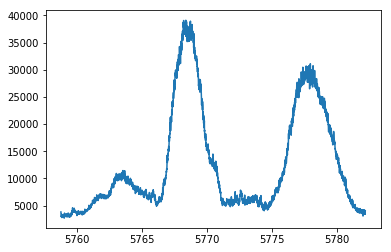

Plot 61


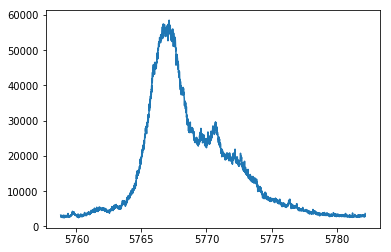

Plot 62


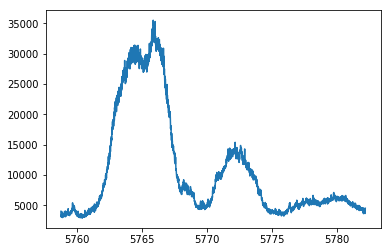

Plot 63


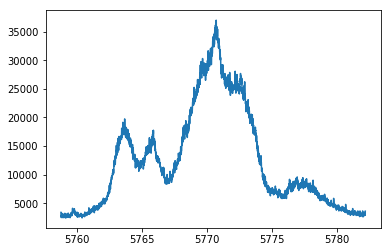

Plot 64


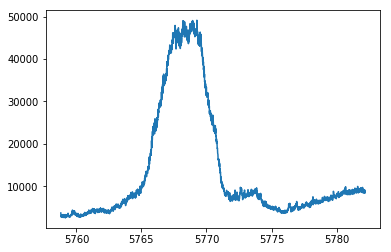

Plot 65


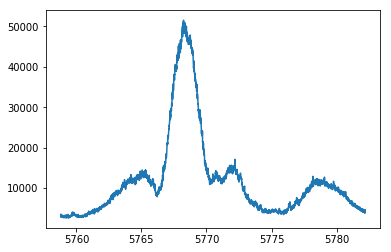

Plot 66


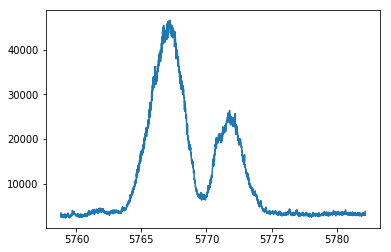

Plot 67


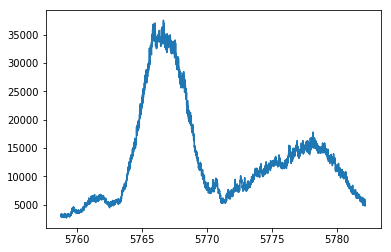

Plot 68


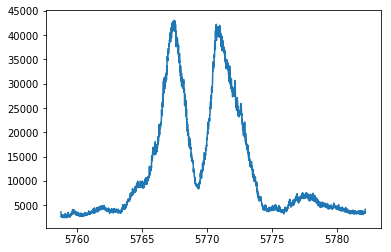

Plot 69


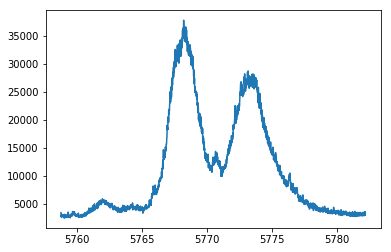

Plot 70


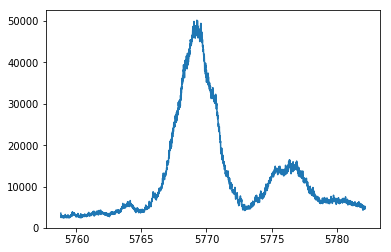

Plot 71


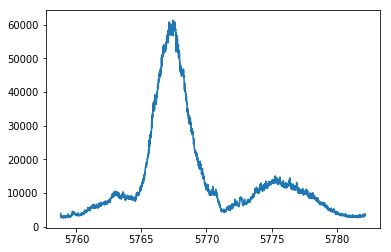

Plot 72


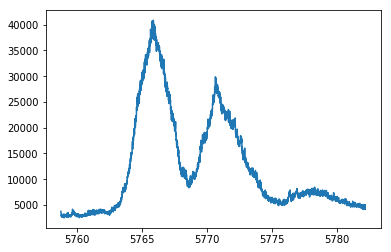

Plot 73


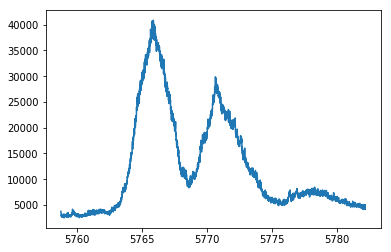

Plot 74


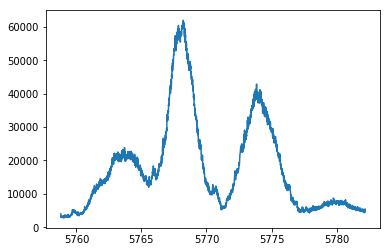

Plot 75


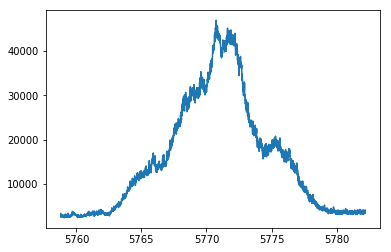

Plot 76


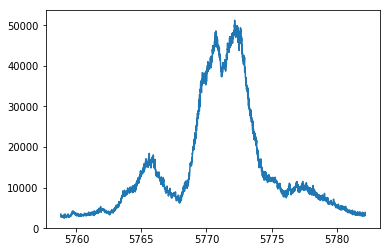

Plot 77


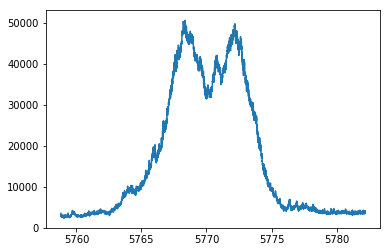

Plot 78


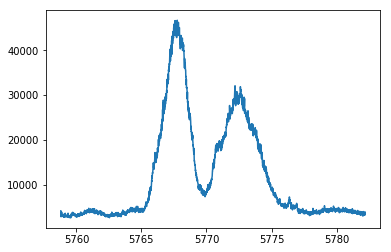

Plot 79


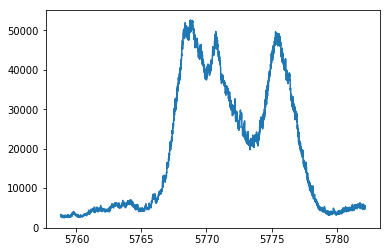

Plot 80


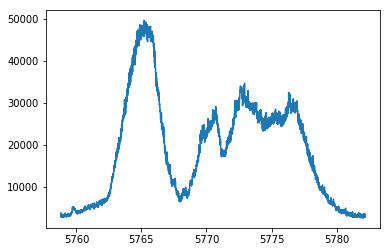

Plot 81


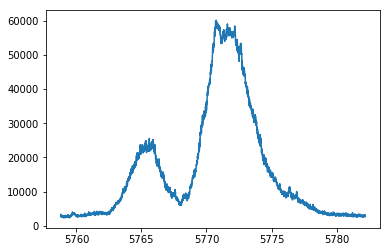

Plot 82


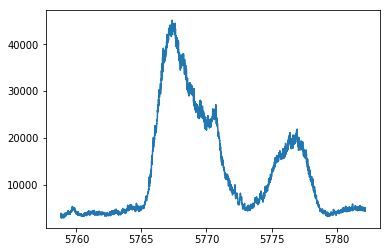

Plot 83


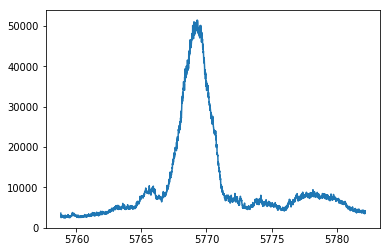

Plot 84


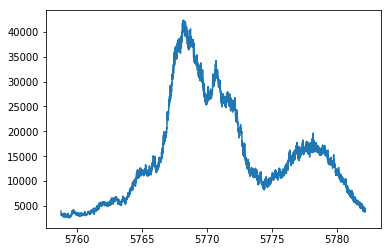

Plot 85


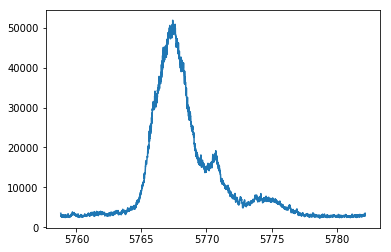

Plot 86


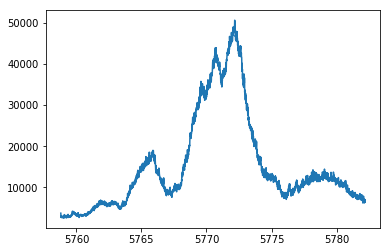

Plot 87


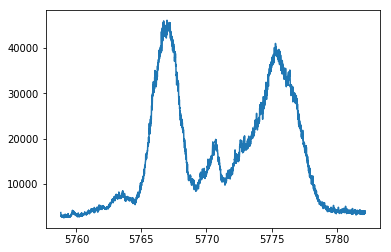

Plot 88


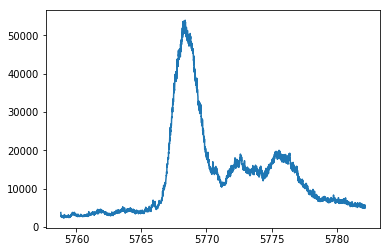

Plot 89


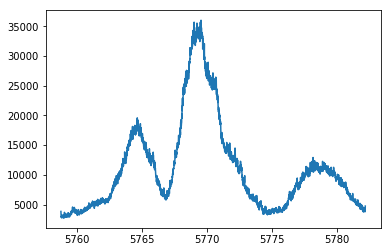

Plot 90


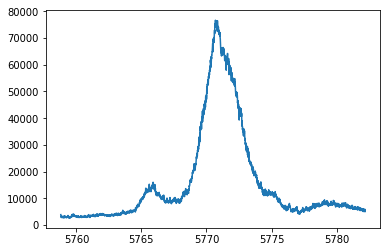

Plot 91


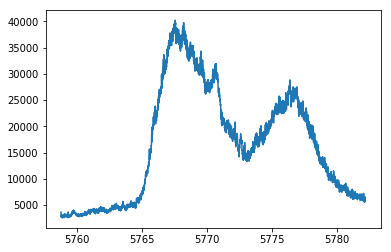

Plot 92


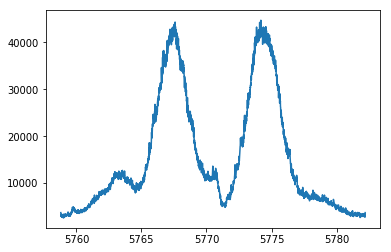

Plot 93


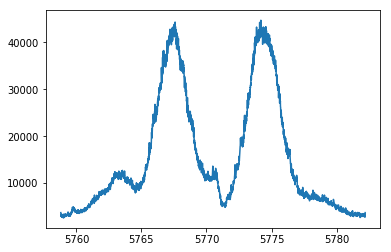

Plot 94


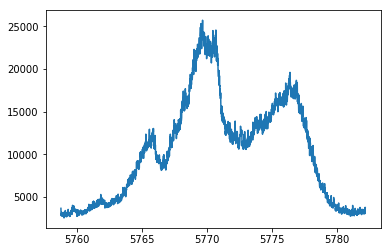

Plot 95


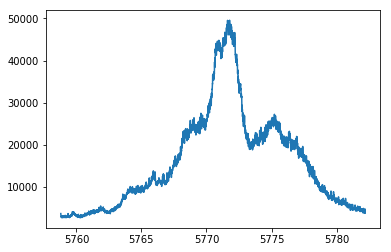

Plot 96


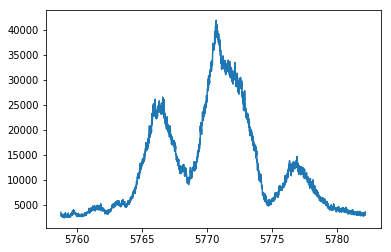

Plot 97


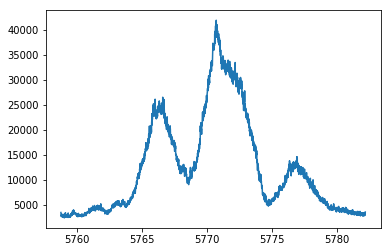

Plot 98


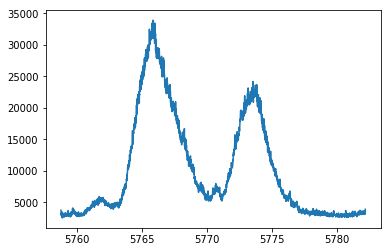

Plot 99


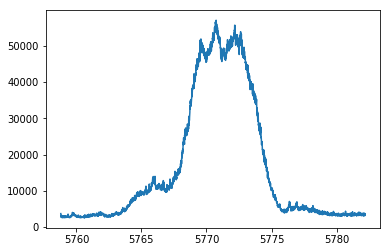

In [6]:
for i in spectrum:
    print("Plot %i"%i)
    y = intense[i,:]
    plt.plot(photE, y)
    plt.show()

In [8]:
print(photE.shape, intense.shape)

(2560,) (100, 2560)


In [59]:
mod = GaussianModel()

pars = mod.guess(intense[14,:], x=photE)
out = mod.fit(intense[14,:], pars, x=photE)

print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 2560
    # variables        = 3
    chi-square         = 2.0381e+11
    reduced chi-square = 79706994.6
    Akaike info crit   = 46579.3001
    Bayesian info crit = 46596.8434
[[Variables]]
    amplitude:  427466.029 +/- 4218.01143 (0.99%) (init = 575332.1)
    center:     5769.27810 +/- 0.05107714 (0.00%) (init = 5768.724)
    sigma:      4.50807728 +/- 0.05192675 (1.15%) (init = 3.854279)
    fwhm:       10.6157106 +/- 0.12227816 (1.15%) == '2.3548200*sigma'
    height:     37828.6063 +/- 371.645608 (0.98%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.587


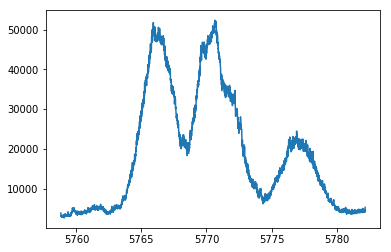

In [60]:
plt.plot(photE,intense[14,:])

In [61]:
gaussResult = out.best_fit

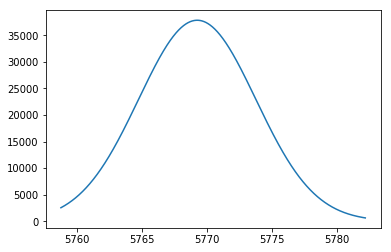

In [62]:
plt.plot(photE,gaussResult)

In [63]:
fourier = np.fft.ifft(gaussResult)

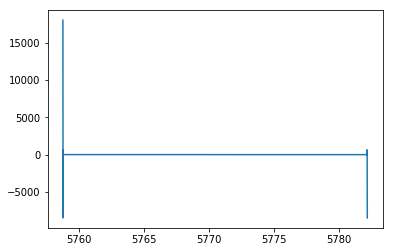

In [64]:
plt.plot(photE,fourier)
# need first Gaussian signal?

Peak finder to generate initial guesses
Astropy to fit curve
Analyse for width etc.
Eg cut off between peaks to use lmfit to obtain values

Or:
Include less points to discard small spikes
Use scipy peak finder to define criteria for peaks - or - find local minima
Split by peaks found
Approximate by Gaussian
Use model above to analyse for width

In [69]:
print(intense.shape)

(100, 2560)


In [80]:
reduced_x = photE[0:len(photE):100]
reduced_y = intense[14,0:len(intense[1,:]):100]

In [81]:
print(reduced_y.shape)

(26,)


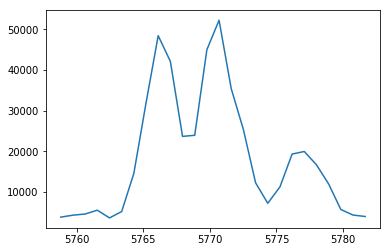

In [82]:
plt.plot(reduced_x,reduced_y)

In [125]:
peaks = sp.signal.find_peaks(reduced_y, height=None, threshold=None, distance=None, prominence=None, 
                        width=None, wlen=None, rel_height=None)
peaks = np.array(peaks[0])
print(peaks.shape)

(4,)


In [127]:
widths = sp.signal.peak_widths(reduced_y, peaks=peaks)[0]

In [150]:
print(widths)
print(len(reduced_y))

[1.35488634 2.07660713 3.52750554 3.3674243 ]
26


In [214]:
def minimafinder(data):
    i = 0
    mins = []
    while i < len(data)-1:
        if (data[i] < data[i-1]) and (data[i] < data[i+1]):
            mins.append(reduced_x[i])
        i = i+1
    return mins

In [256]:
minima = np.array(minimafinder(reduced_y))
print(minima)

[5758.8        5762.45767878 5767.94419695 5774.34513482]


In [261]:
# slicing up dataset by minima
def slicing(minims):
    i = 0
    slices = []
    while i < len(photE):
        j=0
        while j < len(minims):
            if minims[j] == photE[i]:
                slices.append(i)
            j = j+1
        i = i+1
    return slices

In [262]:
data_slices = slicing(minima)

In [263]:
# implement measure to make sure size is equivalent to size of minima

In [284]:
i = 0
while i < len(data_slices):
    if i == len(data_slices) - 1:
        globals()['peak_x%i' % i] = photE[data_slices[i]:]
        globals()['peak_y%i' % i] = intense[14,data_slices[i]:]
    else:
        globals()['peak_x%i' % i] = photE[data_slices[i]:data_slices[i+1]]
        globals()['peak_y%i' % i] = intense[14,data_slices[i]:data_slices[i+1]]
    i = i + 1

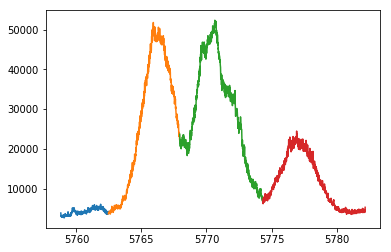

In [290]:
plt.plot(peak_x0,peak_y0)
plt.plot(peak_x1,peak_y1)
plt.plot(peak_x2,peak_y2)
plt.plot(peak_x3,peak_y3)

In [287]:
mod = GaussianModel()

pars = mod.guess(peak_y3, x=peak_x3)
out = mod.fit(peak_y3, pars, x=peak_x3)

print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 860
    # variables        = 3
    chi-square         = 2.6644e+09
    reduced chi-square = 3109021.64
    Akaike info crit   = 12859.8388
    Bayesian info crit = 12874.1096
[[Variables]]
    amplitude:  91100.8393 +/- 570.170861 (0.63%) (init = 94068.7)
    center:     5777.08056 +/- 0.01231977 (0.00%) (init = 5777.064)
    sigma:      1.76319608 +/- 0.01352885 (0.77%) (init = 1.495076)
    fwhm:       4.15200940 +/- 0.03185801 (0.77%) == '2.3548200*sigma'
    height:     20612.5562 +/- 120.156562 (0.58%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.250)
    C(amplitude, sigma) =  0.667


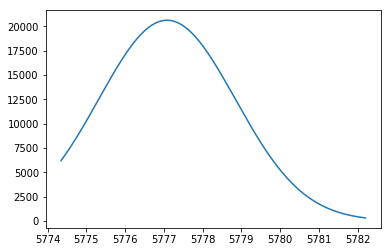

In [289]:
gaussResult = out.best_fit
plt.plot(peak_x3,gaussResult)

/Users/Sara/.local/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


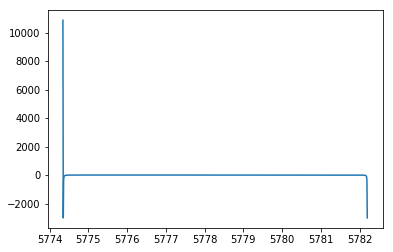

In [291]:
fourier = np.fft.ifft(gaussResult)
plt.plot(peak_x3,fourier)

In [292]:
f.close()